In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('G&T Results 2017-18 (Responses) - Form Responses 1.csv')
df.head()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,4/8/2017 6:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,4/7/2017 10:40:45,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,4/7/2017 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,4/7/2017 10:43:31,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,4/10/2017 10:18:34,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe


## Data Cleansing

In [3]:
df.columns

Index(['Timestamp', 'Entering Grade Level', 'District', 'Birth Month',
       'OLSAT Verbal Score', 'OLSAT Verbal Percentile',
       'NNAT Non Verbal Raw Score', 'NNAT Non Verbal Percentile',
       'Overall Score', 'School Preferences', 'School Assigned',
       'Will you enroll there?'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   117 non-null    object 
 1   Entering Grade Level        117 non-null    object 
 2   District                    101 non-null    float64
 3   Birth Month                 117 non-null    object 
 4   OLSAT Verbal Score          117 non-null    object 
 5   OLSAT Verbal Percentile     117 non-null    object 
 6   NNAT Non Verbal Raw Score   117 non-null    object 
 7   NNAT Non Verbal Percentile  117 non-null    int64  
 8   Overall Score               117 non-null    int64  
 9   School Preferences          75 non-null     object 
 10  School Assigned             29 non-null     object 
 11  Will you enroll there?      71 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 11.1+ KB


In [5]:
df.shape

(117, 12)

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [8]:
df.head()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04-08 06:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04-07 10:40:45,K,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04-07 10:43:31,K,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,2017-04-10 10:18:34,K,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe


In [9]:
df['Entering Grade Level'].value_counts()

K    77
1    28
2    10
3     2
Name: Entering Grade Level, dtype: int64

In [10]:
df['Entering Grade Level'].replace('K', '0', inplace = True)

In [11]:
df.head()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04-08 06:44:01,1,6.0,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04-07 10:40:45,0,NaN,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,NaN,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04-07 10:43:31,0,NaN,September,23,97,40,99,98,NaN,NaN,NaN
4,2017-04-10 10:18:34,0,22.0,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe


In [12]:
df['Entering Grade Level'] = pd.to_numeric(df['Entering Grade Level'], errors = 'coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   117 non-null    datetime64[ns]
 1   Entering Grade Level        117 non-null    int64         
 2   District                    101 non-null    float64       
 3   Birth Month                 117 non-null    object        
 4   OLSAT Verbal Score          117 non-null    object        
 5   OLSAT Verbal Percentile     117 non-null    object        
 6   NNAT Non Verbal Raw Score   117 non-null    object        
 7   NNAT Non Verbal Percentile  117 non-null    int64         
 8   Overall Score               117 non-null    int64         
 9   School Preferences          75 non-null     object        
 10  School Assigned             29 non-null     object        
 11  Will you enroll there?      71 non-null     object        

In [14]:
df['District'].value_counts()

2.0     35
3.0     14
28.0     9
26.0     8
20.0     6
25.0     3
30.0     3
22.0     3
21.0     3
32.0     3
17.0     2
14.0     2
11.0     2
15.0     2
1.0      2
4.0      1
31.0     1
24.0     1
6.0      1
Name: District, dtype: int64

In [15]:
df.District.isnull().sum()

16

In [16]:
df['District'].replace(np.nan, 2.0, inplace = True)

In [17]:
df['District'] = df['District'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   117 non-null    datetime64[ns]
 1   Entering Grade Level        117 non-null    int64         
 2   District                    117 non-null    int32         
 3   Birth Month                 117 non-null    object        
 4   OLSAT Verbal Score          117 non-null    object        
 5   OLSAT Verbal Percentile     117 non-null    object        
 6   NNAT Non Verbal Raw Score   117 non-null    object        
 7   NNAT Non Verbal Percentile  117 non-null    int64         
 8   Overall Score               117 non-null    int64         
 9   School Preferences          75 non-null     object        
 10  School Assigned             29 non-null     object        
 11  Will you enroll there?      71 non-null     object        

In [19]:
df.head()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04-08 06:44:01,1,6,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,YES
1,2017-04-07 10:40:45,0,2,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,2,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04-07 10:43:31,0,2,September,23,97,40,99,98,NaN,NaN,NaN
4,2017-04-10 10:18:34,0,22,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe


In [20]:
df['OLSAT Verbal Score'].value_counts()

28                 18
24                 13
26                 12
25                 11
29                 11
23                 11
27                  7
30                  4
22                  3
19                  3
21                  3
20                  2
18                  2
24/30               2
99                  2
19/30               1
17                  1
17/30               1
83                  1
35                  1
90                  1
23/30               1
97                  1
**                  1
32                  1
-                   1
13                  1
Fill out later.     1
Name: OLSAT Verbal Score, dtype: int64

In [21]:
df['OLSAT Verbal Score'].replace('24/30', '24', inplace = True)
df['OLSAT Verbal Score'].replace('17/30', '17', inplace = True)
df['OLSAT Verbal Score'].replace('23/30', '23', inplace = True)
df['OLSAT Verbal Score'].replace('-', np.nan, inplace = True)
df['OLSAT Verbal Score'].replace(['Fill out later.', '**'], np.nan, inplace = True)
df['OLSAT Verbal Score'].replace('19/30', '19', inplace = True)

In [22]:
df['OLSAT Verbal Score'].value_counts()

28    18
24    15
23    12
26    12
29    11
25    11
27     7
19     4
30     4
22     3
21     3
99     2
17     2
18     2
20     2
83     1
97     1
32     1
13     1
35     1
90     1
Name: OLSAT Verbal Score, dtype: int64

In [23]:
df.dropna(subset=['OLSAT Verbal Score'], inplace = True)

In [24]:
df['OLSAT Verbal Score'] = df['OLSAT Verbal Score'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   114 non-null    datetime64[ns]
 1   Entering Grade Level        114 non-null    int64         
 2   District                    114 non-null    int32         
 3   Birth Month                 114 non-null    object        
 4   OLSAT Verbal Score          114 non-null    int32         
 5   OLSAT Verbal Percentile     114 non-null    object        
 6   NNAT Non Verbal Raw Score   114 non-null    object        
 7   NNAT Non Verbal Percentile  114 non-null    int64         
 8   Overall Score               114 non-null    int64         
 9   School Preferences          74 non-null     object        
 10  School Assigned             28 non-null     object        
 11  Will you enroll there?      70 non-null     object        

In [26]:
df['OLSAT Verbal Percentile'].value_counts()

99    50
97    13
96    11
98    11
89     4
90     3
87     3
81     3
86     3
94     2
83     2
95     2
93     1
84     1
77     1
69     1
55     1
79     1
88     1
Name: OLSAT Verbal Percentile, dtype: int64

In [27]:
df['OLSAT Verbal Percentile'] = df['OLSAT Verbal Percentile'].astype(int)

In [28]:
df['NNAT Non Verbal Raw Score'].value_counts()

40       13
44       11
39       11
45       10
42       10
43        8
41        7
38        7
46        6
37        6
36        3
47        3
34        3
99        3
33        2
48        2
36/48     2
97        1
27        1
35        1
39/48     1
41/48     1
90        1
40/48     1
Name: NNAT Non Verbal Raw Score, dtype: int64

In [29]:
df['NNAT Non Verbal Raw Score'].replace('36/48', '48', inplace = True)
df['NNAT Non Verbal Raw Score'].replace('39/48', '39', inplace = True)
df['NNAT Non Verbal Raw Score'].replace('40/48', '40', inplace = True)
df['NNAT Non Verbal Raw Score'].replace('41/48', '41', inplace = True)

In [30]:
df['NNAT Non Verbal Raw Score'] = df['NNAT Non Verbal Raw Score'].astype(int)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   114 non-null    datetime64[ns]
 1   Entering Grade Level        114 non-null    int64         
 2   District                    114 non-null    int32         
 3   Birth Month                 114 non-null    object        
 4   OLSAT Verbal Score          114 non-null    int32         
 5   OLSAT Verbal Percentile     114 non-null    int32         
 6   NNAT Non Verbal Raw Score   114 non-null    int32         
 7   NNAT Non Verbal Percentile  114 non-null    int64         
 8   Overall Score               114 non-null    int64         
 9   School Preferences          74 non-null     object        
 10  School Assigned             28 non-null     object        
 11  Will you enroll there?      70 non-null     object        

In [32]:
df['NNAT Non Verbal Percentile'].value_counts()

99    99
98    10
95     2
90     2
93     1
Name: NNAT Non Verbal Percentile, dtype: int64

In [33]:
df['Overall Score'].value_counts()

99    60
98    25
96    13
95     5
97     3
94     3
90     2
92     1
91     1
76     1
Name: Overall Score, dtype: int64

In [34]:
df['School Preferences'].isnull().sum()

40

In [35]:
df['Will you enroll there?'].value_counts()

Yes      43
Maybe    22
No        4
YES       1
Name: Will you enroll there?, dtype: int64

In [36]:
df['Will you enroll there?'].replace('YES', 'Yes', inplace = True)

In [37]:
df.head()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04-08 06:44:01,1,6,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,Yes
1,2017-04-07 10:40:45,0,2,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,2,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04-07 10:43:31,0,2,September,23,97,40,99,98,NaN,NaN,NaN
4,2017-04-10 10:18:34,0,22,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe


## Data Visualization

Text(0, 0.5, 'Frequency')

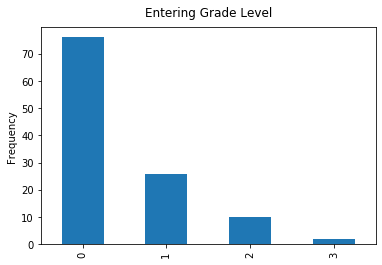

In [38]:
df['Entering Grade Level'].value_counts().plot(kind = 'bar')
plt.title('Entering Grade Level', y= 1.02)
plt.ylabel('Frequency')

In [39]:
# The mode of the dataset for 'Entering Grade Level' is 0.

In [40]:
labels = [0, 1, 2, 3]

Text(0.5, 1.0, 'Pie Chart showing the frequency of entering grade levels')

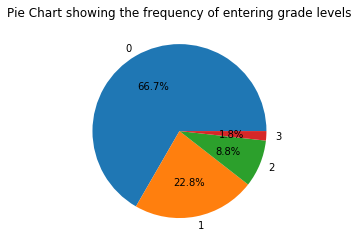

In [41]:
plt.pie(df['Entering Grade Level'].value_counts(), labels = labels, autopct='%1.1f%%')
plt.title('Pie Chart showing the frequency of entering grade levels')

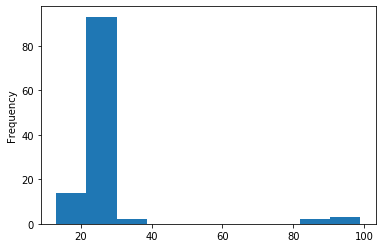

In [42]:
df['OLSAT Verbal Score'].plot(kind = 'hist')

In [43]:
# There are outliers in the distribution. The OLSAT Verbal Score is out of 30, so the points greater than 30 must be removed.

In [44]:
df['OLSAT Verbal Score'] = np.where(df['OLSAT Verbal Score'] > 30, np.nan, df['OLSAT Verbal Score'])

In [45]:
df['OLSAT Verbal Score'].value_counts()

28.0    18
24.0    15
26.0    12
23.0    12
29.0    11
25.0    11
27.0     7
30.0     4
19.0     4
22.0     3
21.0     3
20.0     2
18.0     2
17.0     2
13.0     1
Name: OLSAT Verbal Score, dtype: int64

In [46]:
df.dropna(subset=['OLSAT Verbal Score'], inplace = True)

In [47]:
df['OLSAT Verbal Score'] = df['OLSAT Verbal Score'].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 116
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   107 non-null    datetime64[ns]
 1   Entering Grade Level        107 non-null    int64         
 2   District                    107 non-null    int32         
 3   Birth Month                 107 non-null    object        
 4   OLSAT Verbal Score          107 non-null    int32         
 5   OLSAT Verbal Percentile     107 non-null    int32         
 6   NNAT Non Verbal Raw Score   107 non-null    int32         
 7   NNAT Non Verbal Percentile  107 non-null    int64         
 8   Overall Score               107 non-null    int64         
 9   School Preferences          70 non-null     object        
 10  School Assigned             25 non-null     object        
 11  Will you enroll there?      67 non-null     object        

Text(0.5, 1.02, 'Histogram showing OLSAT Verbal Score')

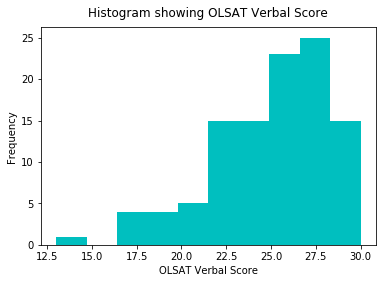

In [49]:
df['OLSAT Verbal Score'].plot(kind = 'hist', color = 'c')
plt.xlabel('OLSAT Verbal Score')
plt.ylabel('Frequency')
plt.title('Histogram showing OLSAT Verbal Score', y= 1.02)

Text(0.5, 1.02, 'Histogram showing NNAT Non Verbal Raw Score')

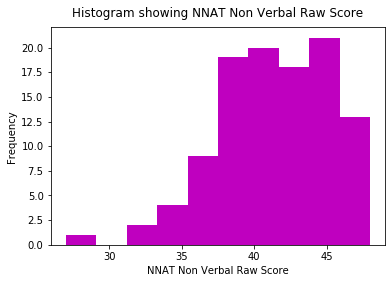

In [50]:
df['NNAT Non Verbal Raw Score'].plot(kind = 'hist', color = 'm')
plt.xlabel('NNAT Non Verbal Raw Score')
plt.ylabel('Frequency')
plt.title('Histogram showing NNAT Non Verbal Raw Score', y= 1.02)

Text(0.5, 1.02, 'Histogram showing Overall Score')

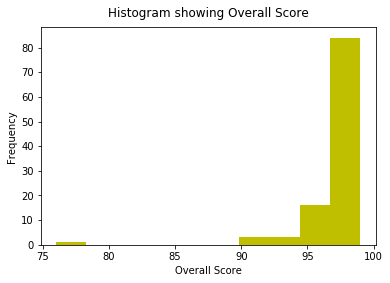

In [51]:
df['Overall Score'].plot(kind = 'hist', color = 'y')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.title('Histogram showing Overall Score', y= 1.02)

In [52]:
# Most of the people have an overall score between 95 and 100.

Text(0.5, 1.02, 'Scatter Plot of Entering grade level and overall score')

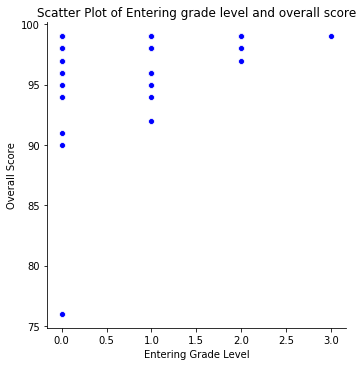

In [53]:
sns.relplot('Entering Grade Level', 'Overall Score', color = 'b', data = df)
plt.title('Scatter Plot of Entering grade level and overall score', y= 1.02)

In [54]:
# As Entering grade level increases, they have higher overall scores.

In [55]:
df.head()

,Timestamp,Entering Grade Level,District,Birth Month,OLSAT Verbal Score,OLSAT Verbal Percentile,NNAT Non Verbal Raw Score,NNAT Non Verbal Percentile,Overall Score,School Preferences,School Assigned,Will you enroll there?
0,2017-04-08 06:44:01,1,6,September,28,99,45,99,99,"NEST+m, TAG, Anderson, Q300",NEST,Yes
1,2017-04-07 10:40:45,0,2,August,25,99,39,99,99,"Anderson, NEST+m",NaN,Maybe
2,2017-04-07 10:41:56,1,2,March,27,96,42,99,98,NaN,NaN,Maybe
3,2017-04-07 10:43:31,0,2,September,23,97,40,99,98,NaN,NaN,NaN
4,2017-04-10 10:18:34,0,22,April,25,98,38,99,99,Brooklyn School of Inquiry,Currently - local Brooklyn dual language,Maybe


In [64]:
enroll = ['Yes', 'Maybe', 'No']

Text(0.5, 1.0, 'Will you enroll to the school you are assigned?')

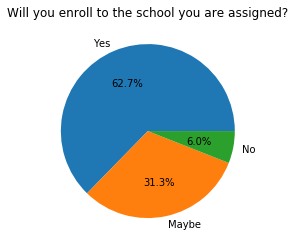

In [67]:
plt.pie(df['Will you enroll there?'].value_counts(), autopct='%1.1f%%', labels = enroll)
plt.title('Will you enroll to the school you are assigned?')